In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_file_path = 'C:/Users/A/Downloads/archive/netflix_titles.csv'

# Read the CSV file into a DataFrame
netflix_data = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(netflix_data.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

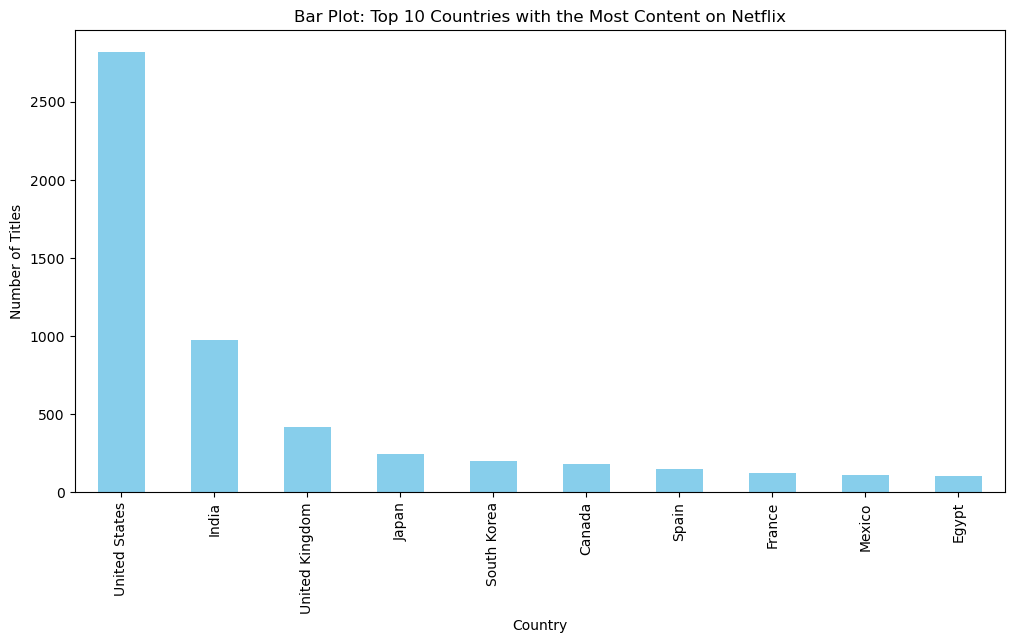

In [3]:
# Bar plot: Top 10 countries with the most content
plt.figure(figsize=(12, 6))
top_countries = netflix_data['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='skyblue')
plt.title('Bar Plot: Top 10 Countries with the Most Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()


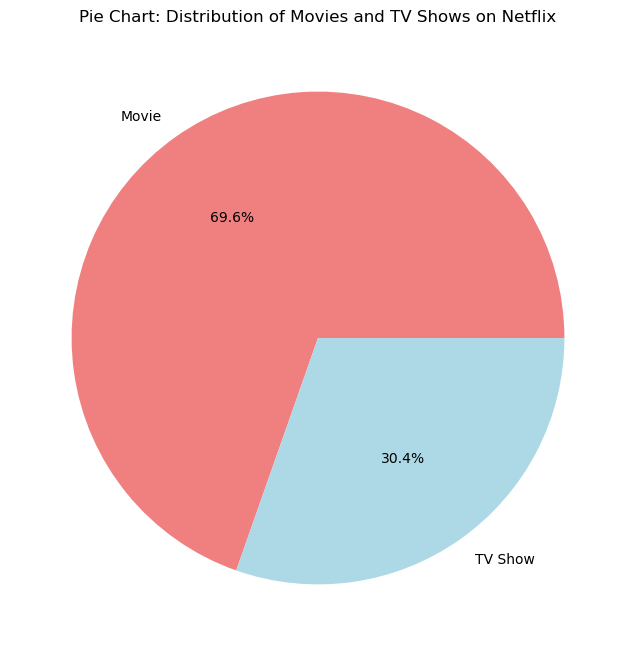

In [4]:
# Pie chart: Distribution of content types (Movies vs. TV Shows)
plt.figure(figsize=(8, 8))
type_distribution = netflix_data['type'].value_counts()
plt.pie(type_distribution, labels=type_distribution.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Pie Chart: Distribution of Movies and TV Shows on Netflix')
plt.show()

In [5]:
# Convert duration from minutes to hours for Movies
movies_data = netflix_data[netflix_data['type'] == 'Movie'].copy()

# Clean and preprocess the 'duration' column
movies_data['duration'] = pd.to_numeric(movies_data['duration'], errors='coerce')

# Drop rows with missing or non-numeric values in the 'duration' column
movies_data = movies_data.dropna(subset=['duration'])

# Check if there's enough data for the scatter plot
if len(movies_data) > 0:
    # Convert duration to hours
    movies_data['duration_hours'] = movies_data['duration'] / 60

    # Scatter plot: Release year vs. Duration (in hours) for Movies
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='release_year', y='duration_hours', data=movies_data, alpha=0.5)
    plt.title('Scatter Plot: Release Year vs. Duration (in hours) for Movies')
    plt.xlabel('Release Year')
    plt.ylabel('Duration (hours)')
    plt.show()
else:
    print("Insufficient data for the scatter plot.")

Insufficient data for the scatter plot.


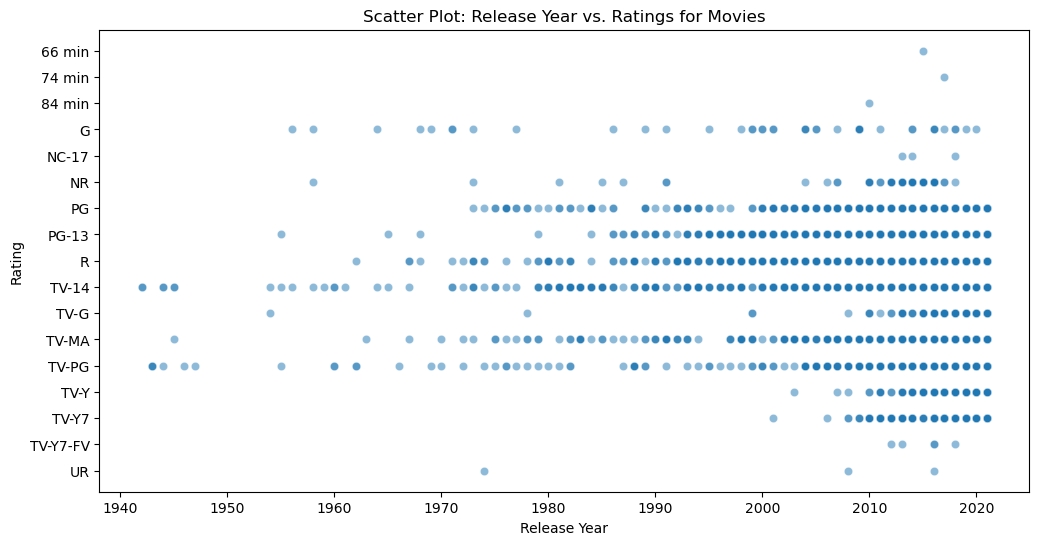

In [6]:
# Filter data for movies
movies_data = netflix_data[netflix_data['type'] == 'Movie'].copy()

# Clean and preprocess the 'release_year' and 'rating' columns
movies_data['release_year'] = pd.to_numeric(movies_data['release_year'], errors='coerce')
movies_data['rating'] = movies_data['rating'].astype('category')

# Drop rows with missing or non-numeric values
movies_data = movies_data.dropna(subset=['release_year', 'rating'])

# Scatter plot: Release year vs. Ratings for Movies
plt.figure(figsize=(12, 6))
sns.scatterplot(x='release_year', y='rating', data=movies_data, alpha=0.5)
plt.title('Scatter Plot: Release Year vs. Ratings for Movies')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.show()

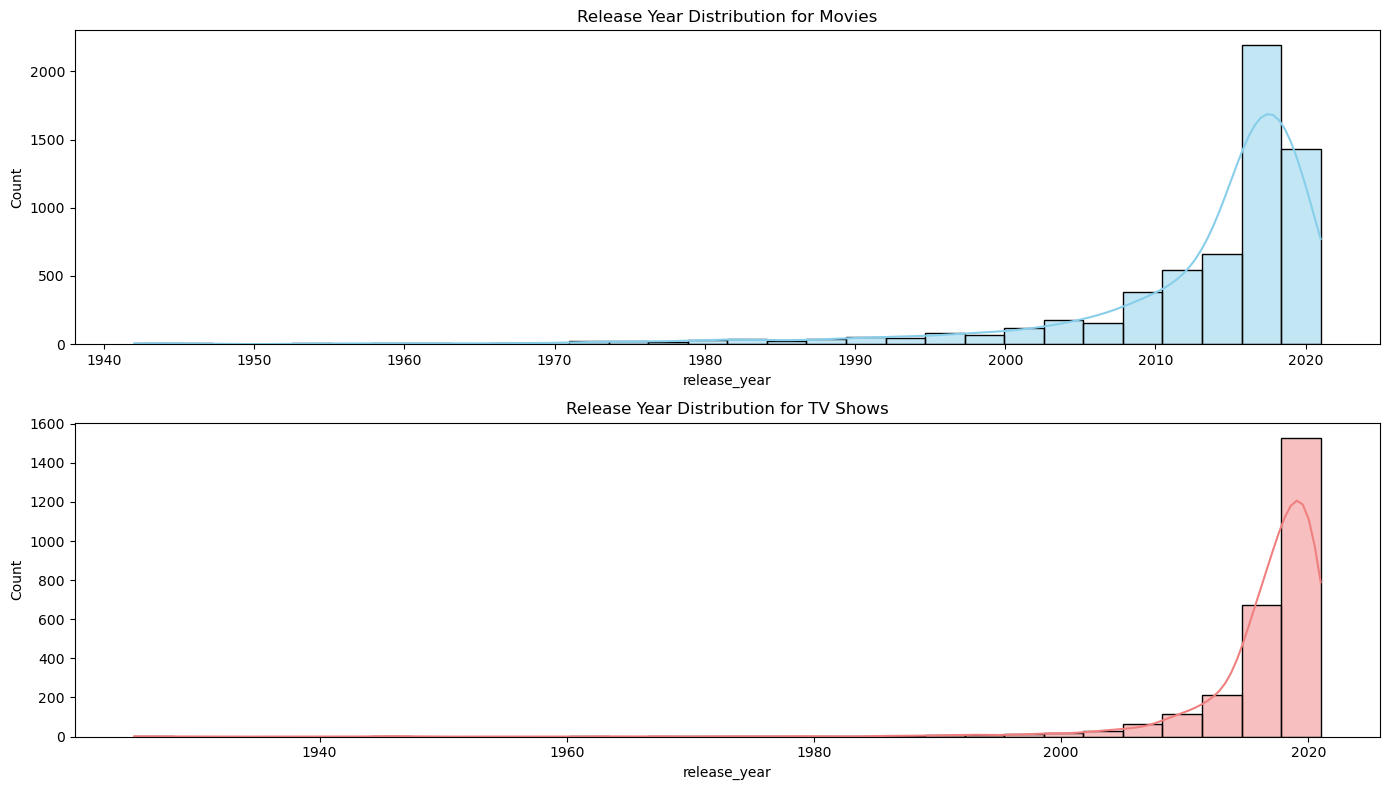

In [7]:
# Subplots: Release year distribution for Movies and TV Shows
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
sns.histplot(data=movies_data, x='release_year', bins=30, kde=True, color='skyblue')
plt.title('Release Year Distribution for Movies')

plt.subplot(2, 1, 2)
tv_shows_data = netflix_data[netflix_data['type'] == 'TV Show']
sns.histplot(data=tv_shows_data, x='release_year', bins=30, kde=True, color='lightcoral')
plt.title('Release Year Distribution for TV Shows')

plt.tight_layout()
plt.show()
